In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from decimal import Decimal
from papermodels.paper.pdf import load_pdf_annotations
from papermodels.datatypes.geometry_graph import GeometryGraph
from papermodels.datatypes.joist_models import (
    JoistArrayModel, 
    collector_trib_model
)

## 1. Create the graph

In [19]:
graph = GeometryGraph.from_pdf_file("sketch_to_scale-vertical-loads.pdf", scale=Decimal(1 / 72 * 4), do_not_process=False)
graph.assign_collector_behaviour(collector_trib_model, as_subelements=False)
les = graph.create_loaded_elements()

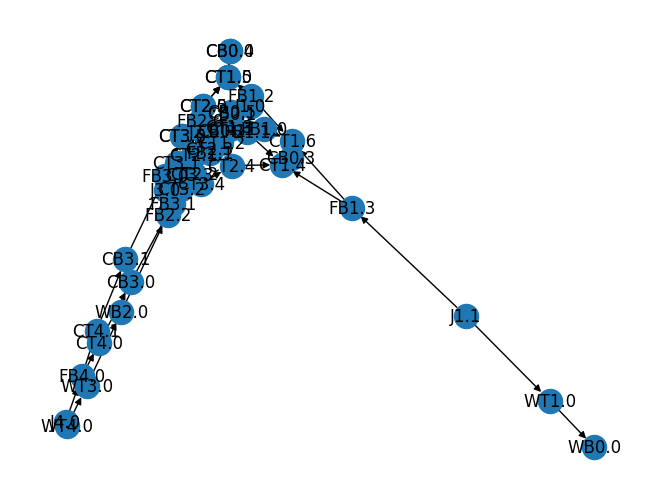

In [20]:
graph.plot_connectivity()

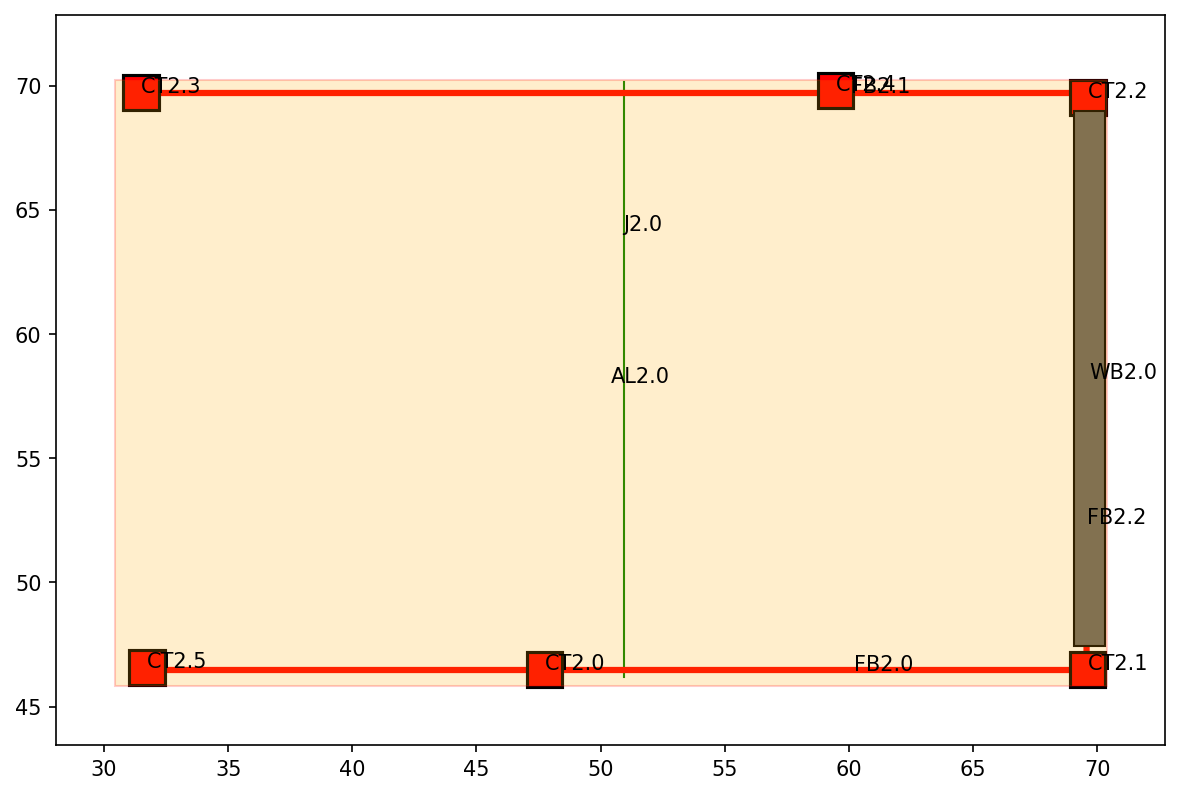

In [21]:
graph.plot_annotations(2)

In [22]:
# Note: The "Wall bottom" annotation transfers as a line load onto the FB2.2 beam and not onto the WT1.0 element on the page below
# The extent of the distributed load matches its location on the FB2.2 beam
les['FB2.2'].model

{'element_attributes': {'tag': 'FB2.2',
  'length': 11.127203479760764,
  'orientation': 'horizontal',
  'vert_correspondent_below': [],
  'vert_correspondent_above': [],
  'horz_intersects_above': ['WB2.0'],
  'horz_intersects_below': ['CT2.1', 'CT2.2']},
 'element_geometry': {'geometry': 'LINESTRING (33.3956 22.3455, 33.4044 33.4727)',
  'supports': [{'location': 0.31170009747658084, 'fixity': 'pin'},
   {'location': 10.69420334435056, 'fixity': 'roller'}]},
 'loads': {'point_loads': [],
  'distributed_loads': [{'transfer_source': 'WB2.0',
    'transfer_reaction_index': 0,
    'occupancy': '',
    'load_components': {},
    'applied_area': 0.0,
    'start_loc': 0.4181001307505899,
    'start_magnitude': 1.0,
    'end_loc': 10.775003369618789,
    'end_magnitude': 1.0,
    'direction': 'gravity'}]}}

In [23]:
# The last elements on the page (the point loads) correctly display their transfers from above
les['CB0.4'].model

{'element_attributes': {'tag': 'CB0.4',
  'length': {},
  'orientation': 'vertical',
  'vert_correspondent_below': [],
  'vert_correspondent_above': ['CT1.5'],
  'horz_intersects_above': [],
  'horz_intersects_below': []},
 'element_geometry': {'geometry': 'POLYGON ((14.8897 22.0142, 14.8897 22.6935, 15.569 22.6935, 15.569 22.0142, 14.8897 22.0142))',
  'supports': []},
 'loads': {'point_loads': [{'location': [],
    'magnitude': 0.0,
    'transfer_source': 'CT1.5',
    'transfer_reaction_index': 0,
    'direction': 'gravity'}],
  'distributed_loads': []}}

## 2. Output the model files

Currently outputs in either JSON or TOML. Both are equivalent to a dictionary and can be parsed by modules in the standard library, i.e. `toml`, `json`.

In [24]:
import pathlib
output_dir = pathlib.Path("model_files")

file_format = "toml" # also try "json"

for loaded_element in les.values():
    if file_format == "toml":
        output_toml = output_dir / "toml"
        output_toml.mkdir(parents=True, exist_ok=True)
        with open(output_dir / "toml" / f"{loaded_element.tag}.toml", "wb") as file:
            loaded_element.dump_toml(file)
    elif file_format == "json":
        output_json = output_dir / "json"
        output_json.mkdir(parents=True, exist_ok=True)
        with open(output_dir / "json" / f"{loaded_element.tag}.json", "w") as file:
            loadeded_element.dump_json(file)
        